<a href="https://colab.research.google.com/github/WendreuMonteiro/Projeto_Natalidade_2024/blob/main/ProjetoNatalidade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [123]:
# Importações de bibliotecas
import pandas as pd
# Visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn import metrics
import numpy as np
from google.colab import drive

# Deixar colunas e linhas aparentes
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [124]:
# Conexão com o drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [125]:
df = pd.read_csv('/content/drive/MyDrive/Classroom/PROJETO/ProjetoNatalidadeFinalizado.csv')

# **ANÁLISE EXPLANATÓRIA**

In [126]:
df.shape

(30, 7)

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   REGIAO              30 non-null     object
 1   ANO                 30 non-null     int64 
 2   Urbanizacao         30 non-null     object
 3   Baixa_escolaridade  30 non-null     object
 4   Media_escolaridade  30 non-null     object
 5   Alta_escolaridade   30 non-null     object
 6   NATALIDADE          30 non-null     int64 
dtypes: int64(2), object(5)
memory usage: 1.8+ KB


# Varias colunas foram identificadas como objeto;
#Removendo as ASPAS e substituindo as virgulas por pontos

In [128]:
# Remover aspas e substituir vírgulas por pontos
df['Urbanizacao'] = df['Urbanizacao'].str.replace('"', '').str.replace(',', '.').astype(float)
df['Baixa_escolaridade'] = df['Baixa_escolaridade'].str.replace('"', '').str.replace(',', '.').astype(float)
df['Media_escolaridade'] = df['Media_escolaridade'].str.replace('"', '').str.replace(',', '.').astype(float)
df['Alta_escolaridade'] = df['Alta_escolaridade'].str.replace('"', '').str.replace(',', '.').astype(float)


In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   REGIAO              30 non-null     object 
 1   ANO                 30 non-null     int64  
 2   Urbanizacao         30 non-null     float64
 3   Baixa_escolaridade  30 non-null     float64
 4   Media_escolaridade  30 non-null     float64
 5   Alta_escolaridade   30 non-null     float64
 6   NATALIDADE          30 non-null     int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 1.8+ KB


In [130]:
df.head()

,REGIAO,ANO,Urbanizacao,Baixa_escolaridade,Media_escolaridade,Alta_escolaridade,NATALIDADE
0,NORDESTE,2018,623453.250,497088.900,307123.950,28452.900,836850
1,NORDESTE,2019,601540.425,466254.225,308420.325,30600.450,805275
2,NORDESTE,2020,577245.312,435438.720,304421.760,30827.520,770688
3,NORDESTE,2021,575321.574,422106.774,307961.748,34473.330,766074
4,NORDESTE,2022,533858.175,382137.525,293515.650,33321.825,708975


#TIPOS DE DADOS

In [131]:
# 3. Tipos de dados encontrados
print("Tipos de dados encontrados: float, object e int")
print(df.dtypes)

Tipos de dados encontrados: float, object e int
REGIAO                 object
ANO                     int64
Urbanizacao           float64
Baixa_escolaridade    float64
Media_escolaridade    float64
Alta_escolaridade     float64
NATALIDADE              int64
dtype: object


#Verificando a coluna REGIAO

In [132]:
print([df['REGIAO']])

[0         NORDESTE
1         NORDESTE
2         NORDESTE
3         NORDESTE
4         NORDESTE
5         NORDESTE
6          SUDESTE
7          SUDESTE
8          SUDESTE
9          SUDESTE
10         SUDESTE
11         SUDESTE
12           NORTE
13           NORTE
14           NORTE
15           NORTE
16           NORTE
17           NORTE
18             SUL
19             SUL
20             SUL
21             SUL
22             SUL
23             SUL
24    CENTRO_OESTE
25    CENTRO_OESTE
26    CENTRO_OESTE
27    CENTRO_OESTE
28    CENTRO_OESTE
29    CENTRO_OESTE
Name: REGIAO, dtype: object]


#Estatisticas das variaveis do dataframe

In [133]:
df.describe() # Estatísticas das variáveis numéricas

,ANO,Urbanizacao,Baixa_escolaridade,Media_escolaridade,Alta_escolaridade,NATALIDADE
count,30.000000,3.000000e+01,30.000000,30.000000,30.000000,3.000000e+01
mean,2020.500000,4.582312e+05,224615.507967,266027.309600,52335.069467,5.431766e+05
std,1.737021,2.967883e+05,139191.756750,170155.335434,42659.382775,3.180618e+05
min,2018.000000,1.693984e+05,75946.080000,119846.480000,16919.084000,2.243270e+05
25%,2019.000000,2.185175e+05,110789.202250,128902.657500,25909.602500,2.922772e+05
50%,2020.500000,3.167277e+05,155777.190500,199795.274000,32074.672500,3.689350e+05
75%,2022.000000,5.954666e+05,362335.106250,307752.298500,54421.659000,7.966282e+05
max,2023.000000,1.069010e+06,497088.900000,607913.180000,144522.756000,1.147006e+06


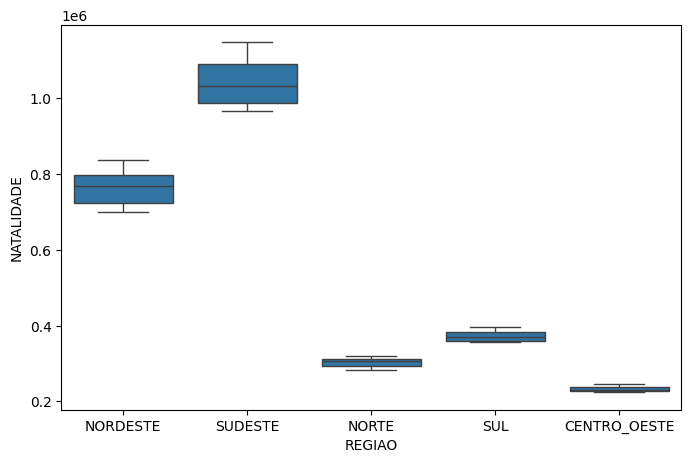

In [134]:
# Gráfico Boxplot
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='REGIAO', y='NATALIDADE')
plt.show()

#Observando a correlaçao de cada variavel e criando um df menor, pra calcular a correlaçao das variaveis

In [135]:
df_menor = df.drop(columns=['REGIAO'])

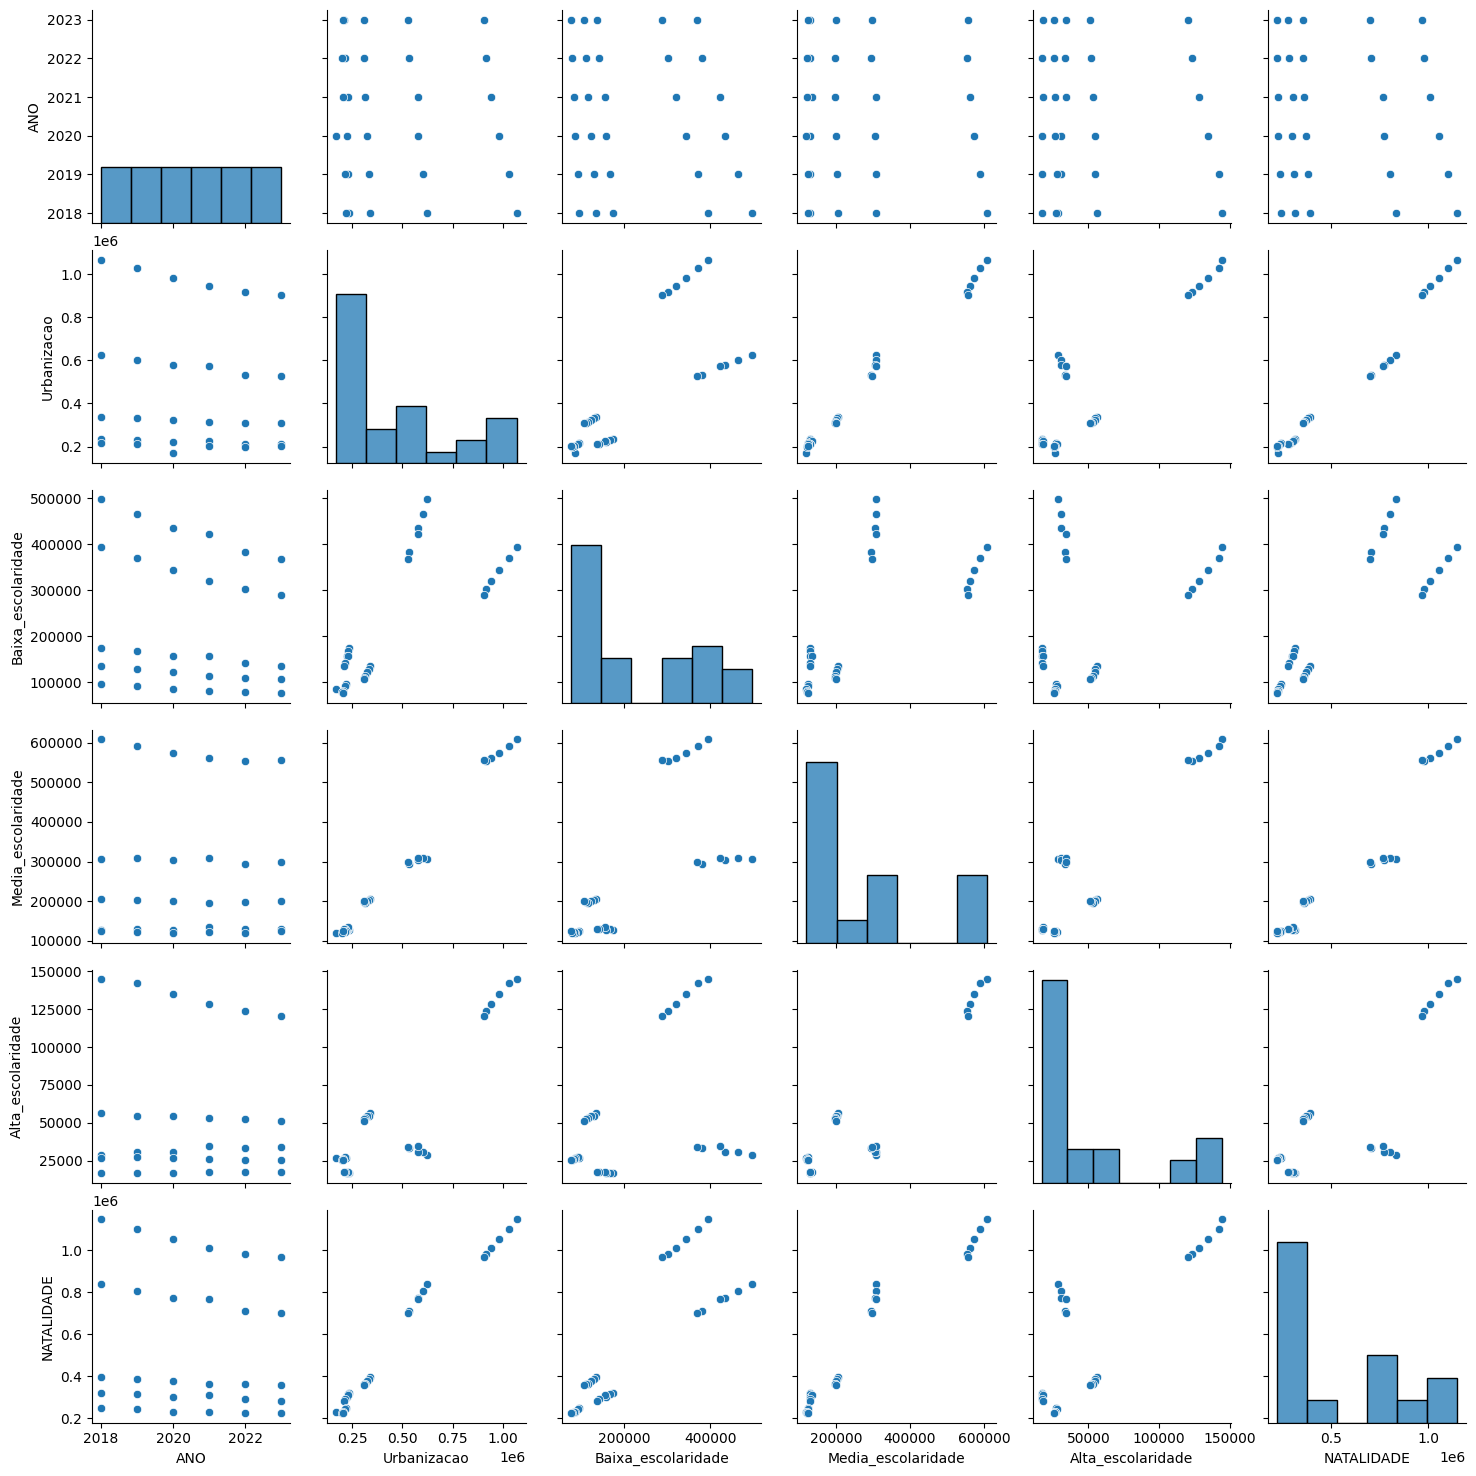

                         ANO  Urbanizacao  Baixa_escolaridade  \
ANO                 1.000000    -0.078881           -0.162865   
Urbanizacao        -0.078881     1.000000            0.763913   
Baixa_escolaridade -0.162865     0.763913            1.000000   
Media_escolaridade -0.028920     0.993839            0.695436   
Alta_escolaridade  -0.041609     0.885104            0.384003   
NATALIDADE         -0.092970     0.984997            0.862269   

                    Media_escolaridade  Alta_escolaridade  NATALIDADE  
ANO                          -0.028920          -0.041609   -0.092970  
Urbanizacao                   0.993839           0.885104    0.984997  
Baixa_escolaridade            0.695436           0.384003    0.862269  
Media_escolaridade            1.000000           0.923832    0.963351  
Alta_escolaridade             0.923832           1.000000    0.796061  
NATALIDADE                    0.963351           0.796061    1.000000  


In [136]:
sns.pairplot(df.drop(columns=['REGIAO']))
plt.show()

# Calcular correlações
correlation_matrix = df_menor.corr()
print(correlation_matrix)

#Só a NATALIDADE

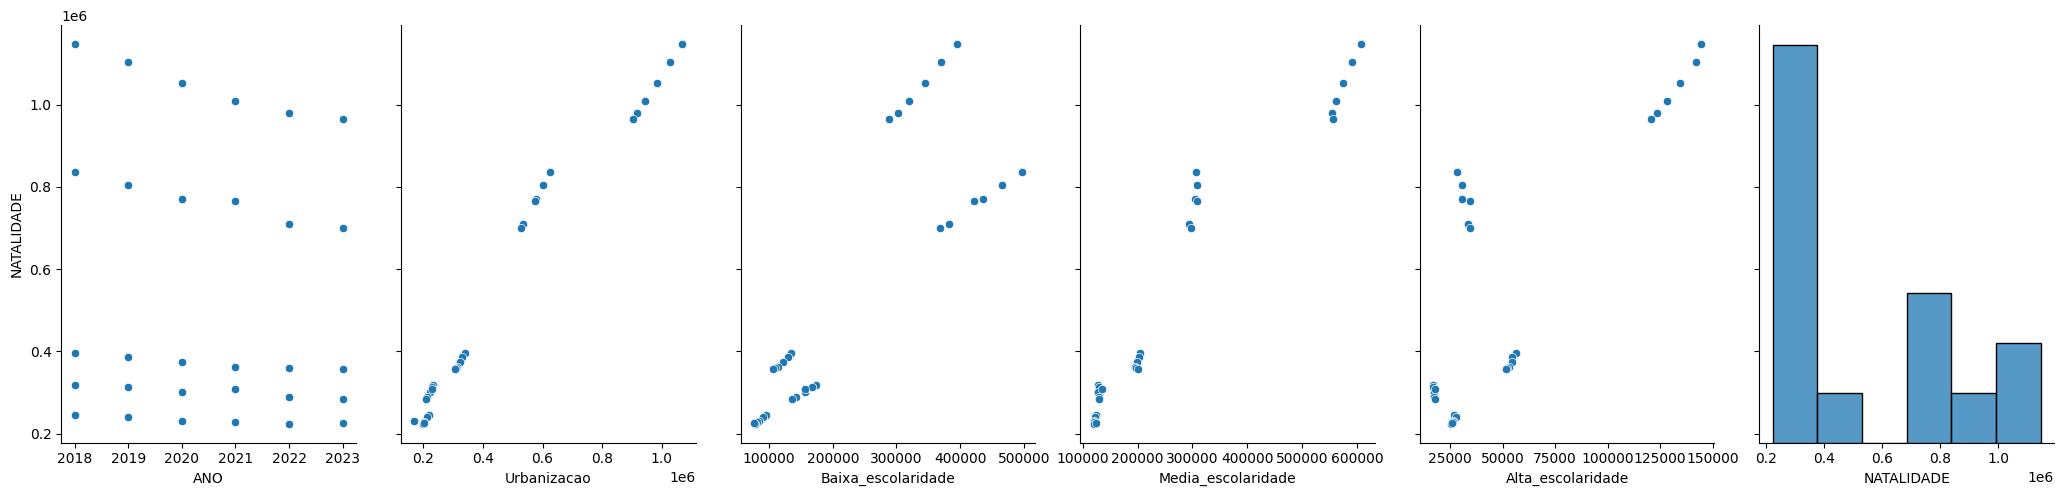

                         ANO  Urbanizacao  Baixa_escolaridade  \
ANO                 1.000000    -0.078881           -0.162865   
Urbanizacao        -0.078881     1.000000            0.763913   
Baixa_escolaridade -0.162865     0.763913            1.000000   
Media_escolaridade -0.028920     0.993839            0.695436   
Alta_escolaridade  -0.041609     0.885104            0.384003   
NATALIDADE         -0.092970     0.984997            0.862269   

                    Media_escolaridade  Alta_escolaridade  NATALIDADE  
ANO                          -0.028920          -0.041609   -0.092970  
Urbanizacao                   0.993839           0.885104    0.984997  
Baixa_escolaridade            0.695436           0.384003    0.862269  
Media_escolaridade            1.000000           0.923832    0.963351  
Alta_escolaridade             0.923832           1.000000    0.796061  
NATALIDADE                    0.963351           0.796061    1.000000  


In [137]:
#O mesmo gráfico mas com Apenas as correlações da NATALIDADE

sns.pairplot(df_menor, x_vars=df_menor[:-1], y_vars='NATALIDADE', height=5, aspect=0.7)
plt.show()

correlation_matrix_natalidade = df_menor.corr()
print(correlation_matrix_natalidade)

#REGRESSAO LINEAR MULTIPLA

In [160]:
# Função para avaliar os modelos
def evaluate_model(y_true, y_pred):
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    r2 = r2_score(y_true, y_pred)
    return rmse, r2

In [171]:

# Definir variáveis explicativas (X) e resposta (y)
X = df_menor[['Urbanizacao', 'Baixa_escolaridade', 'Media_escolaridade', 'Alta_escolaridade']]
y = df_menor['NATALIDADE']

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Treinar o modelo de regressão linear múltipla'

# Treinar modelos
# Regressão Linear
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
rmse_lr, r2_lr = evaluate_model(y_test, y_pred_lr)

# Fazer previsões
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

# Avaliar o modelo

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('RMSE:', mean_squared_error(y_test, y_pred, squared=False))
print(f'MSE: {mse}')
print("R2: ",r2_score(y_test, y_pred))


MAE: 178.1965255588099
RMSE: 219.4811193350915
MSE: 48171.961744584674
R2:  0.999999513317364


#Criando o Modelo com XGB e avaliando as metricas

In [163]:
# Criando o objeto da regressão XGBOOST
xgb_regressor = XGBRegressor(random_state=42)

# Modelo
xgb_regressor.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [164]:
# XGBoost
xgb = XGBRegressor(random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
rmse_xgb, r2_xgb = evaluate_model(y_test, y_pred_xgb)

In [165]:
print("RMSE_XGB: ",rmse_xgb)
print("R2_XGB: ",r2_xgb)
print('MAE_xgb:', metrics.mean_absolute_error(y_test, y_pred_xgb))
print('MSE_xgb:', metrics.mean_squared_error(y_test, y_pred_xgb))

RMSE_XGB:  36747.15024158884
R2_XGB:  0.9863573465058253
MAE_xgb: 28015.637152777777
MSE_xgb: 1350353050.8779025


#Criando o Modelo com AdaBoost e avaliando as metricas

In [166]:
# AdaBoost
ada = AdaBoostRegressor(random_state=42)
ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)
rmse_ada, r2_ada = evaluate_model(y_test, y_pred_ada)

In [155]:
print('MAE_ada:', metrics.mean_absolute_error(y_test, y_pred_ada))
print('MSE_ada:', metrics.mean_squared_error(y_test, y_pred_ada))
print('RMSE_ada:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_ada)))
print("R2: ",r2_ada)

MAE_ada: 22612.645833333332
MSE_ada: 950721539.7109375
RMSE_ada: 30833.77271290261
R2:  0.9922117510077826


#Resultados:

In [167]:
# Exibir resultados
results = pd.DataFrame({
    'Model': ['Linear Regression', 'XGBoost', 'AdaBoost'],
    'RMSE': [rmse_lr, rmse_xgb, rmse_ada],
    'R2 Score': [r2_lr, r2_xgb, r2_ada]
})

results

,Model,RMSE,R2 Score
0,Linear Regression,219.481119,1.000000
1,XGBoost,36747.150242,0.986357
2,AdaBoost,22534.588872,0.994870


#Criando um dataframe para as previsoes em 2024

In [168]:

regioes = df['REGIAO'].unique()
ano_2024 = 2024
urbanizacao_2024 = df.groupby('REGIAO')['Urbanizacao'].mean().values
baixa_escolaridade_2024 = df.groupby('REGIAO')['Baixa_escolaridade'].mean().values
media_escolaridade_2024 = df.groupby('REGIAO')['Media_escolaridade'].mean().values
alta_escolaridade_2024 = df.groupby('REGIAO')['Alta_escolaridade'].mean().values

data_2024 = pd.DataFrame({
    'REGIAO': regioes,
    'ANO': ano_2024,
    'Urbanizacao': urbanizacao_2024,
    'Baixa_escolaridade': baixa_escolaridade_2024,
    'Media_escolaridade': media_escolaridade_2024,
    'Alta_escolaridade': alta_escolaridade_2024
})

# Previsões para 2024
data_2024['NATALIDADE_PRED_LR'] = lr.predict(data_2024[['Urbanizacao', 'Baixa_escolaridade', 'Media_escolaridade', 'Alta_escolaridade']])
data_2024['NATALIDADE_PRED_XGB'] = xgb.predict(data_2024[['Urbanizacao', 'Baixa_escolaridade', 'Media_escolaridade', 'Alta_escolaridade']])
data_2024['NATALIDADE_PRED_ADA'] = ada.predict(data_2024[['Urbanizacao', 'Baixa_escolaridade', 'Media_escolaridade', 'Alta_escolaridade']])

data_2024

,REGIAO,ANO,Urbanizacao,Baixa_escolaridade,Media_escolaridade,Alta_escolaridade,NATALIDADE_PRED_LR,NATALIDADE_PRED_XGB,NATALIDADE_PRED_ADA
0,NORDESTE,2024,200581.005833,84056.295500,122268.424000,26453.115333,2.328839e+05,226278.671875,233555.5
1,SUDESTE,2024,573368.109333,428571.354667,303184.438833,31999.140167,7.647369e+05,708979.062500,769150.0
2,NORTE,2024,222753.416167,154811.749500,130585.531000,17312.552833,3.029061e+05,301711.843750,301635.0
3,SUL,2024,974405.581167,336617.608167,573897.772667,132305.119167,1.042817e+06,980143.562500,1102997.0
4,CENTRO_OESTE,2024,320047.782500,119020.532000,200200.381500,53605.419833,3.726339e+05,362777.156250,368935.0


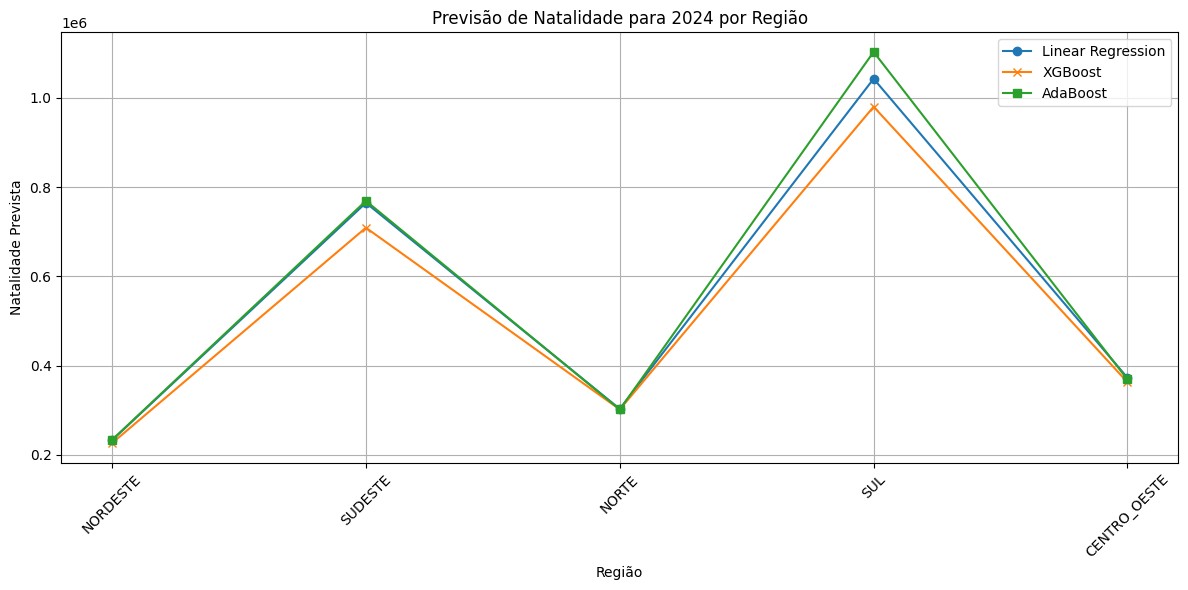

(               Model          RMSE  R2 Score
 0  Linear Regression    219.481119  1.000000
 1            XGBoost  36747.150242  0.986357
 2           AdaBoost  22534.588872  0.994870,
          REGIAO   ANO    Urbanizacao  Baixa_escolaridade  Media_escolaridade  \
 0      NORDESTE  2024  200581.005833        84056.295500       122268.424000   
 1       SUDESTE  2024  573368.109333       428571.354667       303184.438833   
 2         NORTE  2024  222753.416167       154811.749500       130585.531000   
 3           SUL  2024  974405.581167       336617.608167       573897.772667   
 4  CENTRO_OESTE  2024  320047.782500       119020.532000       200200.381500   
 
    Alta_escolaridade  NATALIDADE_PRED_LR  NATALIDADE_PRED_XGB  \
 0       26453.115333        2.328839e+05        226278.671875   
 1       31999.140167        7.647369e+05        708979.062500   
 2       17312.552833        3.029061e+05        301711.843750   
 3      132305.119167        1.042817e+06        980143.562500 

In [169]:
# Gráfico das previsões
plt.figure(figsize=(12, 6))
plt.plot(data_2024['REGIAO'], data_2024['NATALIDADE_PRED_LR'], marker='o', label='Linear Regression')
plt.plot(data_2024['REGIAO'], data_2024['NATALIDADE_PRED_XGB'], marker='x', label='XGBoost')
plt.plot(data_2024['REGIAO'], data_2024['NATALIDADE_PRED_ADA'], marker='s', label='AdaBoost')
plt.xlabel('Região')
plt.ylabel('Natalidade Prevista')
plt.title('Previsão de Natalidade para 2024 por Região')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

results, data_2024